## Exploring data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.genfromtxt("136737-regression.txt", skip_header=1)
attributes = len(data[0])

print("attributes:", attributes, "data:", len(data))

attributes: 78 data: 443


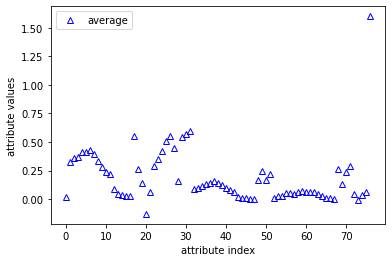

36.0
3056.0


'from google.colab import files\n\nplt.savefig("min_max.png")\nfiles.download("min_max.png") '

In [ ]:
min_attributes = np.zeros(attributes)
max_attributes = np.zeros(attributes)
average = np.zeros(attributes)
std = np.zeros(attributes)

for index in range(0, attributes):
  min_attributes[index] = np.min(data[:, index])
  max_attributes[index] = np.max(data[:, index])
  average[index] = np.mean(data[:, index])
  std[index] = np.std(data[:, index])

# plt.plot(np.arange(0., attributes), min_attributes[:attributes], 'ro', fillstyle="none")
# plt.plot(np.arange(0., attributes), max_attributes[:attributes], 'gs', fillstyle="none")
# plt.plot(np.arange(0., attributes - 1), min_attributes[:attributes - 1], 'ro', fillstyle="none")
# plt.plot(np.arange(0., attributes - 1), max_attributes[:attributes - 1], 'gs', fillstyle="none")
plt.plot(np.arange(0., attributes - 1), average[:attributes - 1], 'b^', fillstyle="none")
plt.ylabel('attribute values')
plt.xlabel('attribute index')
plt.legend(['average']) # 'min value', max_value, std
plt.show()

print(min_attributes[attributes - 1])
print(max_attributes[attributes - 1])

'''from google.colab import files

plt.savefig("min_max.png")
files.download("min_max.png") '''

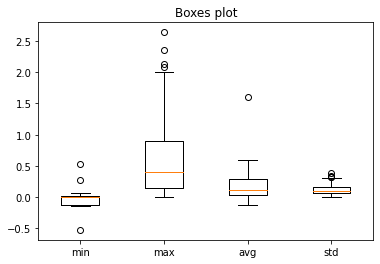

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

data = [min_attributes[:attributes - 1], max_attributes[:attributes - 1], average[:attributes - 1], std[:attributes - 1]]
fig, ax = plt.subplots()
ax.set_title('Boxes plot')
ax.boxplot(data)
plt.xticks([1, 2, 3, 4], ['min', 'max', 'avg', 'std'])

plt.show()

## Regression metrics

### Imports libraries

In [ ]:
from sklearn import linear_model 
from sklearn import neighbors # KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neural_network import MLPRegressor 
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error # przykład dla R2 i MSE 

### Calculate data

In [ ]:
dane = np.genfromtxt("136737-regression.txt", skip_header=1)
print(dane.shape) 
Xregr=dane[:,0:-1] 
yregr=dane[:,-1] 

labels = ['Linear Regression', 'K-Neighbors Regressor', 'Decision Tree Regressor', 'MLP Regressor', 'SVR - linear', 'SVR - rbf']
r_2 = []
mse = []

print_metrics = lambda regresor,opis,X,y: print(opis,': R^2=%.2f,'%regresor.score(X, y), ' MSE=%.1f'%mean_squared_error(y, regresor.predict(X))) 

regr = linear_model.LinearRegression()
regr.fit(Xregr, yregr) 
mse.append(mean_squared_error(yregr, regr.predict(Xregr)))
r_2.append(regr.score(Xregr, yregr))
print_metrics(regr, 'LinearRegression', Xregr, yregr)

regr = neighbors.KNeighborsRegressor() 
regr.fit(Xregr, yregr) 
mse.append(mean_squared_error(yregr, regr.predict(Xregr)))
r_2.append(regr.score(Xregr, yregr))
print_metrics(regr, 'KNeighborsRegressor', Xregr, yregr)

regr = DecisionTreeRegressor(max_depth=2) 
regr.fit(Xregr, yregr) 
mse.append(mean_squared_error(yregr, regr.predict(Xregr)))
r_2.append(regr.score(Xregr, yregr))
print_metrics(regr, 'DecisionTreeRegressor', Xregr, yregr)

regr = MLPRegressor() 
regr.fit(Xregr, yregr) 
mse.append(mean_squared_error(yregr, regr.predict(Xregr)))
r_2.append(regr.score(Xregr, yregr))
print_metrics(regr, 'MLPRegressor', Xregr, yregr)

regr = SVR(kernel="linear") 
regr.fit(Xregr, yregr) 
mse.append(mean_squared_error(yregr, regr.predict(Xregr)))
r_2.append(regr.score(Xregr, yregr))
print_metrics(regr, 'SVR - linear', Xregr, yregr)

regr = SVR(kernel="rbf") 
regr.fit(Xregr, yregr) 
mse.append(mean_squared_error(yregr, regr.predict(Xregr)))
r_2.append(regr.score(Xregr, yregr))
print_metrics(regr, 'SVR - rbf', Xregr, yregr)

print()

(443, 78)
LinearRegression : R^2=0.33,  MSE=60663.0
KNeighborsRegressor : R^2=0.33,  MSE=60407.1
DecisionTreeRegressor : R^2=0.18,  MSE=74006.9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor : R^2=-0.10,  MSE=99954.3
SVR - linear : R^2=-0.01,  MSE=91655.8
SVR - rbf : R^2=-0.03,  MSE=93364.7



### Draw graphs

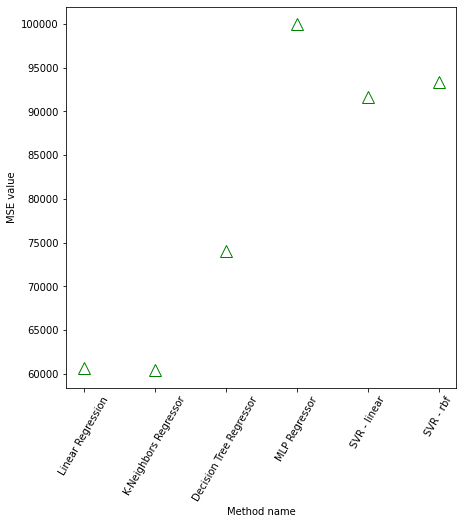

In [ ]:
plt.subplots(figsize=(7, 7))
plt.plot(labels, mse, 'g^', fillstyle="none", markersize=12)
plt.ylabel('MSE value')
plt.xlabel('Method name')
plt.xticks(rotation=60)
plt.show()

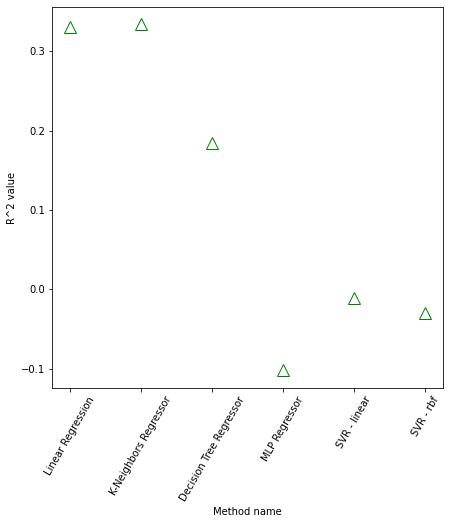

In [ ]:
plt.subplots(figsize=(7, 7))
plt.plot(labels, r_2, 'g^', fillstyle="none", markersize=12)
plt.ylabel('R^2 value')
plt.xlabel('Method name')
plt.xticks(rotation=60)
plt.show()

### Normalize data

In [ ]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler # albo inny, bardziej odpowiedni 


Xregr=dane[:,0:-1] 
yregr=dane[:,-1] 

labels = ['Linear Regression', 'K-Neighbors Regressor', 'Decision Tree Regressor', 'MLP Regressor', 'SVR - linear', 'SVR - rbf']
r_2_v2 = []
mse_v2 = []

print_metrics = lambda regresor,opis,X,y: print(opis,': R^2=%.2f,'%regresor.score(X, y), ' MSE=%.1f'%mean_squared_error(y, regresor.predict(X))) 


regr = make_pipeline(StandardScaler(), linear_model.LinearRegression())
regr.fit(Xregr, yregr) 
mse_v2.append(mean_squared_error(yregr, regr.predict(Xregr)))
r_2_v2.append(regr.score(Xregr, yregr))
print_metrics(regr, 'LinearRegression', Xregr, yregr)


regr = make_pipeline(StandardScaler(), neighbors.KNeighborsRegressor()) 
regr.fit(Xregr, yregr) 
mse_v2.append(mean_squared_error(yregr, regr.predict(Xregr)))
r_2_v2.append(regr.score(Xregr, yregr))
print_metrics(regr, 'KNeighborsRegressor', Xregr, yregr)


regr = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=2)) 
regr.fit(Xregr, yregr) 
mse_v2.append(mean_squared_error(yregr, regr.predict(Xregr)))
r_2_v2.append(regr.score(Xregr, yregr))
print_metrics(regr, 'DecisionTreeRegressor', Xregr, yregr)


regr = make_pipeline(StandardScaler(), MLPRegressor()) 
regr.fit(Xregr, yregr) 
mse_v2.append(mean_squared_error(yregr, regr.predict(Xregr)))
r_2_v2.append(regr.score(Xregr, yregr))
print_metrics(regr, 'MLPRegressor', Xregr, yregr)


regr = make_pipeline(StandardScaler(), SVR(kernel="linear")) 
regr.fit(Xregr, yregr) 
mse_v2.append(mean_squared_error(yregr, regr.predict(Xregr)))
r_2_v2.append(regr.score(Xregr, yregr))
print_metrics(regr, 'SVR - linear', Xregr, yregr)


regr = make_pipeline(StandardScaler(), SVR(kernel="rbf") )
regr.fit(Xregr, yregr) 
mse_v2.append(mean_squared_error(yregr, regr.predict(Xregr)))
r_2_v2.append(regr.score(Xregr, yregr))
print_metrics(regr, 'SVR - rbf', Xregr, yregr)

print()

LinearRegression : R^2=0.33,  MSE=60663.0
KNeighborsRegressor : R^2=0.34,  MSE=60237.4
DecisionTreeRegressor : R^2=0.18,  MSE=74006.9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor : R^2=-0.10,  MSE=99342.2
SVR - linear : R^2=0.09,  MSE=82257.4
SVR - rbf : R^2=-0.03,  MSE=93257.7



### Draw new graphs

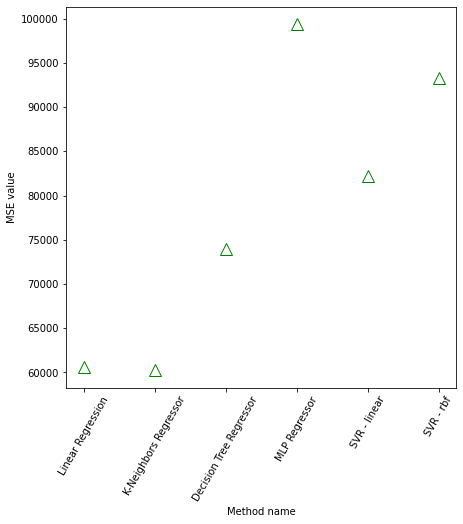

In [ ]:
plt.subplots(figsize=(7, 7))
plt.plot(labels, mse_v2, 'g^', fillstyle="none", markersize=12)
plt.ylabel('MSE value')
plt.xlabel('Method name')
plt.xticks(rotation=60)
plt.show()

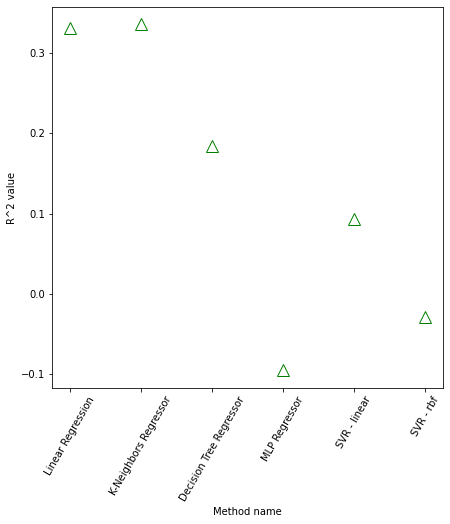

In [ ]:
plt.subplots(figsize=(7, 7))
plt.plot(labels, r_2_v2, 'g^', fillstyle="none", markersize=12)
plt.ylabel('R^2 value')
plt.xlabel('Method name')
plt.xticks(rotation=60)
plt.show()

### Calculate difference with(out) normalization

In [ ]:
statistics = []

for i in range(len(r_2)):
  statistics.append(min(r_2[i], r_2_v2[i]) * min(mse[i], mse_v2[i]) if min(r_2[i], r_2_v2[i]) > 0 else (1 + abs(min(r_2[i], r_2_v2[i]))) * min(mse[i], mse_v2[i]))
  print(labels[i])
  print("r^2:", r_2[i] - r_2_v2[i])
  print("MSE:", mse[i] - mse_v2[i])
  print()

print(statistics)

Linear Regression
r^2: -2.2315482794965646e-14
MSE: 2.0227162167429924e-09

K-Neighbors Regressor
r^2: -0.0018717791233537895
MSE: 169.76090293454763

Decision Tree Regressor
r^2: 0.0
MSE: 0.0

MLP Regressor
r^2: -0.006748708321070218
MSE: 612.0737238344736

SVR - linear
r^2: -0.10362668913199491
MSE: 9398.416776678743

SVR - rbf
r^2: -0.0011799061746891083
MSE: 107.01152454056137

[20087.41691768107, 20116.42349741814, 13617.397205277588, 109484.33897995845, 83128.86229637222, 96002.82479992602]


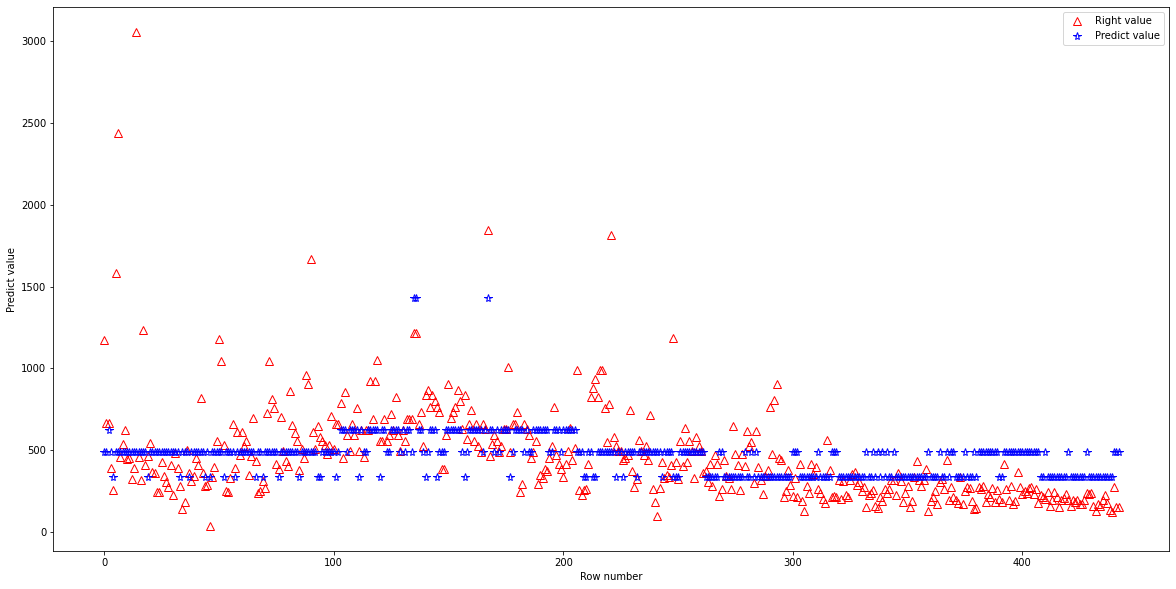

In [ ]:
Xregr=dane[:,0:-1] 
yregr=dane[:,-1] 

regr = DecisionTreeRegressor(max_depth=2) 
regr.fit(Xregr, yregr) 

plt.subplots(figsize=(20, 10))

plt.plot(yregr, 'r^', fillstyle="none", markersize=8)
plt.plot(regr.predict(Xregr), 'b*', fillstyle="none", markersize=8)
plt.ylabel('Predict value')
plt.xlabel('Row number')
plt.legend(['Right value', 'Predict value'])

plt.show()

### Draw all predict vs right value

Linear Regresssion

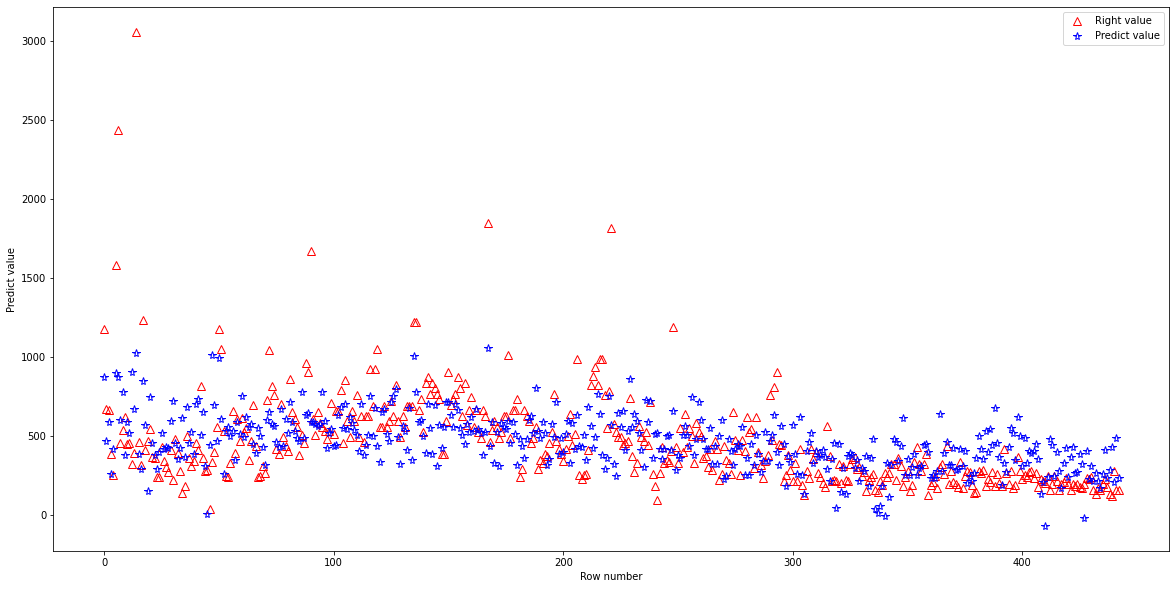

In [ ]:
Xregr=dane[:,0:-1] 
yregr=dane[:,-1] 

regr = linear_model.LinearRegression()
regr.fit(Xregr, yregr) 

plt.subplots(figsize=(20, 10))

plt.plot(yregr, 'r^', fillstyle="none", markersize=8)
plt.plot(regr.predict(Xregr), 'b*', fillstyle="none", markersize=8)
plt.ylabel('Predict value')
plt.xlabel('Row number')
plt.legend(['Right value', 'Predict value'])

plt.show()

KNeighborsRegressor

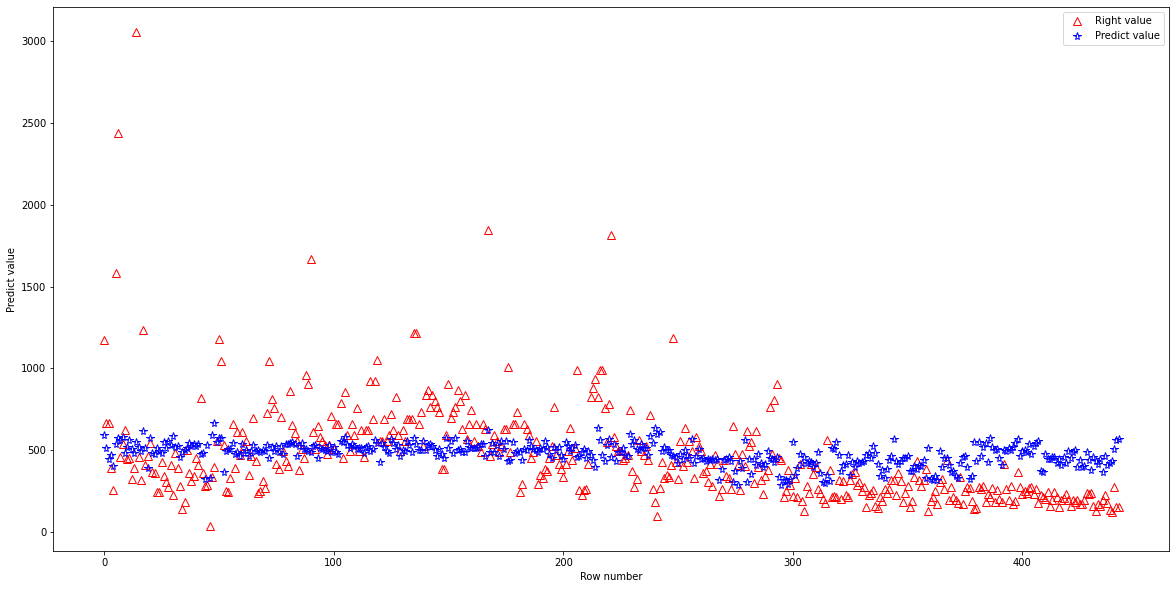

In [ ]:
Xregr=dane[:,0:-1] 
yregr=dane[:,-1] 

regr = make_pipeline(StandardScaler(), neighbors.KNeighborsRegressor(n_neighbors=50)) 
regr.fit(Xregr, yregr) 

plt.subplots(figsize=(20, 10))

plt.plot(yregr, 'r^', fillstyle="none", markersize=8)
plt.plot(regr.predict(Xregr), 'b*', fillstyle="none", markersize=8)
plt.ylabel('Predict value')
plt.xlabel('Row number')
plt.legend(['Right value', 'Predict value'])

plt.show()

MLPRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


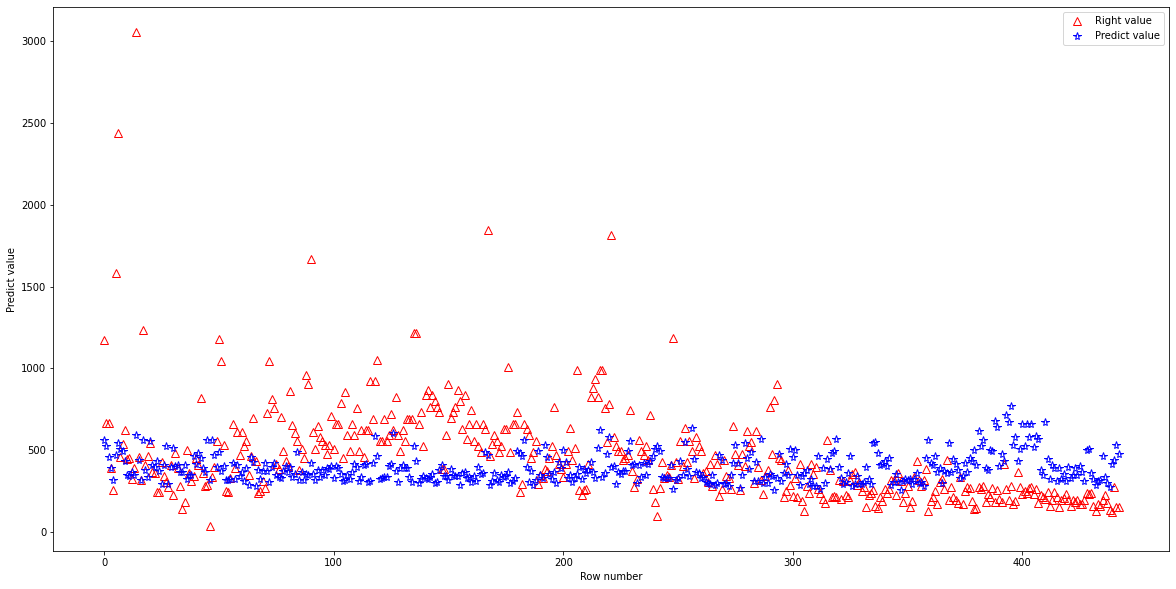

In [ ]:
Xregr=dane[:,0:-1] 
yregr=dane[:,-1] 

regr = MLPRegressor()
regr.fit(Xregr, yregr) 

plt.subplots(figsize=(20, 10))

plt.plot(yregr, 'r^', fillstyle="none", markersize=8)
plt.plot(regr.predict(Xregr), 'b*', fillstyle="none", markersize=8)
plt.ylabel('Predict value')
plt.xlabel('Row number')
plt.legend(['Right value', 'Predict value'])

plt.show()

SVR - linear

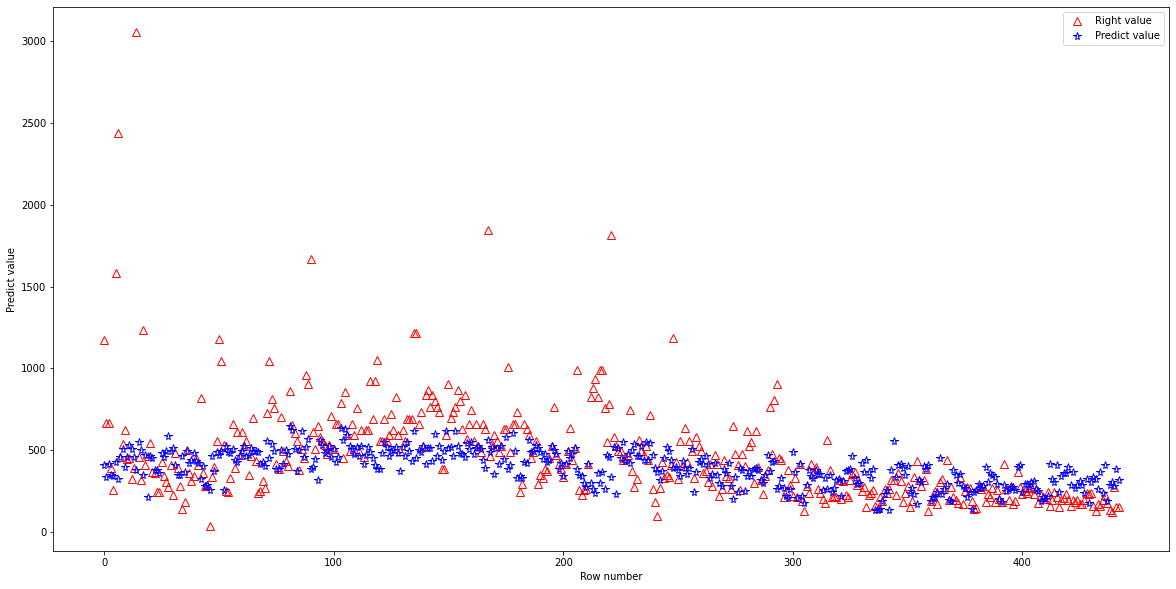

In [ ]:
Xregr=dane[:,0:-1] 
yregr=dane[:,-1] 

regr = make_pipeline(StandardScaler(), SVR(kernel="linear") )
regr.fit(Xregr, yregr) 

plt.subplots(figsize=(20, 10))

plt.plot(yregr, 'r^', fillstyle="none", markersize=8)
plt.plot(regr.predict(Xregr), 'b*', fillstyle="none", markersize=8)
plt.ylabel('Predict value')
plt.xlabel('Row number')
plt.legend(['Right value', 'Predict value'])

plt.show()

SVR - rbf

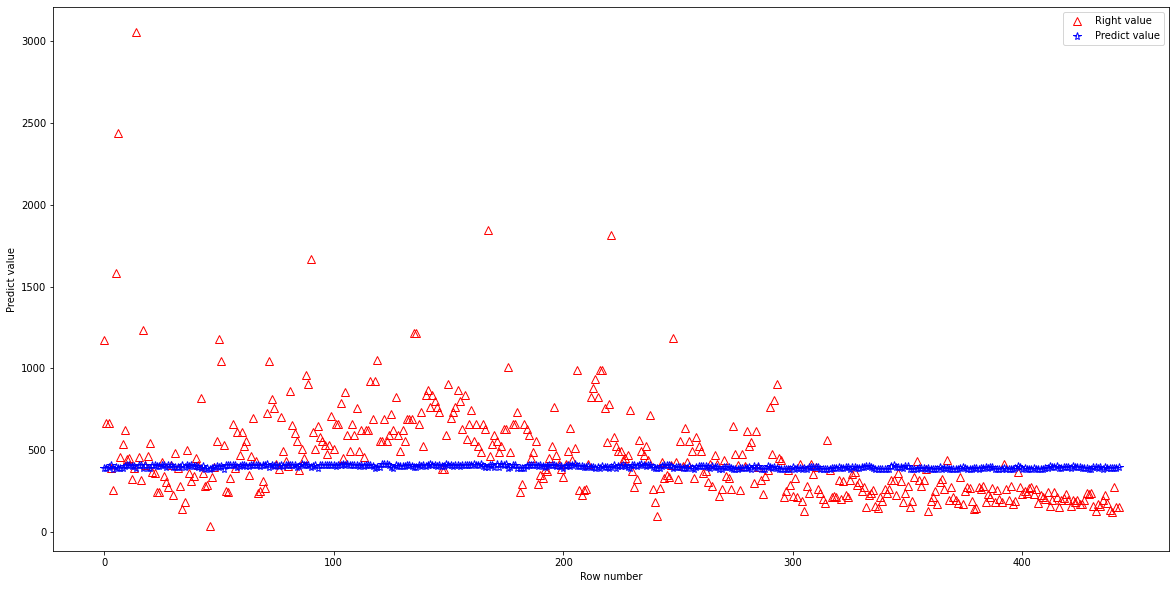

In [ ]:
Xregr=dane[:,0:-1] 
yregr=dane[:,-1] 

regr = make_pipeline(StandardScaler(), SVR(kernel="rbf") )
regr.fit(Xregr, yregr) 

plt.subplots(figsize=(20, 10))

plt.plot(yregr, 'r^', fillstyle="none", markersize=8)
plt.plot(regr.predict(Xregr), 'b*', fillstyle="none", markersize=8)
plt.ylabel('Predict value')
plt.xlabel('Row number')
plt.legend(['Right value', 'Predict value'])

plt.show()

## Metrics with 10 - cross validation 

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

dane = np.genfromtxt("136737-regression.txt", skip_header=1)
print(dane.shape) 
Xregr=dane[:,0:-1] 
yregr=dane[:,-1] 

labels = ['Linear Regression', 'K-Neighbors Regressor', 'Decision Tree Regressor', 'MLP Regressor', 'SVR - linear', 'SVR - rbf']
r_2_cross = []
mse_cross = []

scoring = {'r2': 'r2', 'mean_squared_error': make_scorer(mean_squared_error, greater_is_better=True)}

print('LinearRegression')
regr = make_pipeline(StandardScaler(), linear_model.LinearRegression())
scores = cross_validate(regr, Xregr, yregr, cv = 10,  scoring=scoring, return_train_score=True)
mse_cross.append(np.mean(scores['train_mean_squared_error']))
r_2_cross.append(np.mean(scores['train_r2']))


print('K-Neighbors Regressor')
regr = make_pipeline(StandardScaler(), neighbors.KNeighborsRegressor()) 
scores = cross_validate(regr, Xregr, yregr, cv = 10,  scoring=scoring, return_train_score=True)
mse_cross.append(np.mean(scores['train_mean_squared_error']))
r_2_cross.append(np.mean(scores['train_r2']))


print('Decision Tree Regressor')
regr = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=2)) 
scores = cross_validate(regr, Xregr, yregr, cv = 10,  scoring=scoring, return_train_score=True)
mse_cross.append(np.mean(scores['train_mean_squared_error']))
r_2_cross.append(np.mean(scores['train_r2']))


print('MLP Regressor')
regr = make_pipeline(StandardScaler(), MLPRegressor()) 
scores = cross_validate(regr, Xregr, yregr, cv = 10,  scoring=scoring, return_train_score=True)
mse_cross.append(np.mean(scores['train_mean_squared_error']))
r_2_cross.append(np.mean(scores['train_r2']))


print('SVR - linear')
regr = make_pipeline(StandardScaler(), SVR(kernel="linear")) 
scores = cross_validate(regr, Xregr, yregr, cv = 10,  scoring=scoring, return_train_score=True)
mse_cross.append(np.mean(scores['train_mean_squared_error']))
r_2_cross.append(np.mean(scores['train_r2']))


print('SVR - rbf')
regr = make_pipeline(StandardScaler(), SVR(kernel="rbf")) 
scores = cross_validate(regr, Xregr, yregr, cv = 10,  scoring=scoring, return_train_score=True)
mse_cross.append(np.mean(scores['train_mean_squared_error']))
r_2_cross.append(np.mean(scores['train_r2']))

(443, 78)
LinearRegression
K-Neighbors Regressor
Decision Tree Regressor
MLP Regressor


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


SVR - linear
SVR - rbf


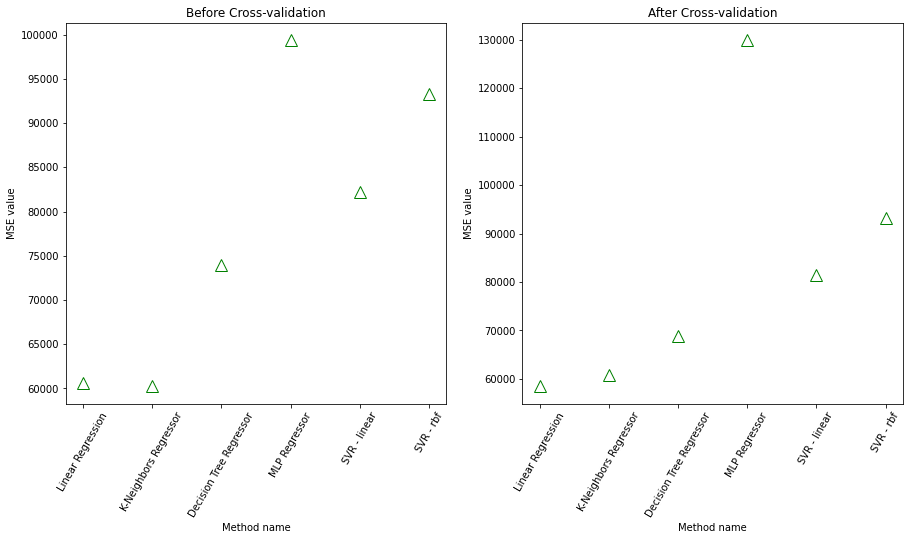

[60663.02187064433, 60237.3801805869, 74006.92323421533, 99342.19272937055, 82257.39042628491, 93257.66018386134]
[58475.342058990944, 60746.200191212956, 68895.78471229578, 129857.9409949703, 81396.16698288258, 93155.37558307064]


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].plot(labels, mse_v2, 'g^', fillstyle="none", markersize=12)
ax[0].set_ylabel('MSE value')
ax[0].set_xlabel('Method name')
ax[0].set_xticklabels(labels, rotation=60)
ax[0].set_title('Before Cross-validation')

ax[1].plot(labels, mse_cross, 'g^', fillstyle="none", markersize=12)
ax[1].set_ylabel('MSE value')
ax[1].set_xlabel('Method name')
ax[1].set_xticklabels(labels, rotation=60)
ax[1].set_title('After Cross-validation')

plt.show()

print(mse_v2)
print(mse_cross)

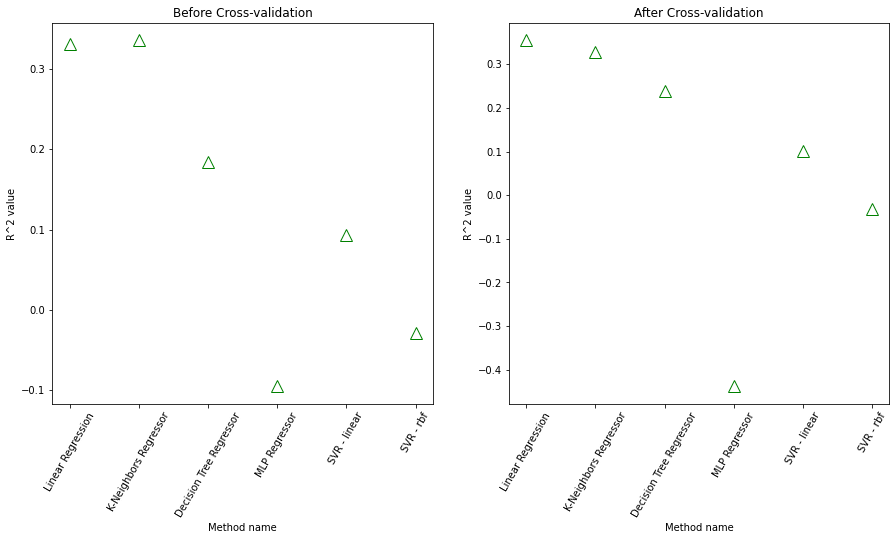

[0.3311311619212791, 0.33582427568131656, 0.1840016664681705, -0.09534432961113337, 0.09303223840153707, -0.028256438364220312]
[0.3546101418241267, 0.3290565526441685, 0.23878275551928724, -0.43791984598384015, 0.10218593121993388, -0.030629540707605617]


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].plot(labels, r_2_v2, 'g^', fillstyle="none", markersize=12)
ax[0].set_ylabel('R^2 value')
ax[0].set_xlabel('Method name')
ax[0].set_xticklabels(labels, rotation=60)
ax[0].set_title('Before Cross-validation')

ax[1].plot(labels, r_2_cross, 'g^', fillstyle="none", markersize=12)
ax[1].set_ylabel('R^2 value')
ax[1].set_xlabel('Method name')
ax[1].set_xticklabels(labels, rotation=60)
ax[1].set_title('After Cross-validation')

plt.show()

print(r_2_v2)
print(r_2_cross)